In [ ]:
# Install yfinance if not already installed
!pip install yfinance --quiet

# Import required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Define tickers and download historical data
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ICICIBANK.NS']
data = yf.download(tickers, start='2023-01-01', end='2025-05-31', group_by='ticker')

# Save raw data to CSV (optional but useful for backup)
for ticker in tickers:
    data[ticker].to_csv(f'{ticker}_historical.csv')


C:\Users\Nisarg\AppData\Local\Temp\ipykernel_22152\1827777167.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2023-01-01', end='2025-05-31', group_by='ticker')
[*********************100%***********************]  5 of 5 completed


In [ ]:
# Check head of one stock data
data['RELIANCE.NS'].head()

# Check if all 5 files are downloaded correctly
import os
print([file for file in os.listdir() if file.endswith('.csv')])


['HDFCBANK.NS_historical.csv', 'ICICIBANK.NS_historical.csv', 'INFY.NS_historical.csv', 'RELIANCE.NS_historical.csv', 'TCS.NS_historical.csv']


In [ ]:
import pandas as pd
import glob

# Load all the CSVs from the current directory
csv_files = glob.glob("*.csv")

all_data = []

for file in csv_files:
    df = pd.read_csv(file, parse_dates=['Date'])
    df['Company'] = file.replace('_historical.csv', '')  # Extract company name from file
    df['Daily Return (%)'] = df['Close'].pct_change() * 100
    df['20-Day MA'] = df['Close'].rolling(window=20).mean()
    df['50-Day MA'] = df['Close'].rolling(window=50).mean()
    all_data.append(df)

# Combine all into one DataFrame
combined_df = pd.concat(all_data)
combined_df.reset_index(drop=True, inplace=True)

# Save the cleaned and engineered data
combined_df.to_csv('stock_data_combined.csv', index=False)
combined_df.head()


,Date,Open,High,Low,Close,Volume,Company,Daily Return (%),20-Day MA,50-Day MA
0,2023-01-02,1586.883590,1599.319217,1578.641986,1588.541626,2190689,HDFCBANK.NS,NaN,NaN,NaN
1,2023-01-03,1582.202036,1602.489226,1582.202036,1598.929199,4189015,HDFCBANK.NS,0.653906,NaN,NaN
2,2023-01-04,1594.686331,1605.171271,1567.376718,1570.351562,5175800,HDFCBANK.NS,-1.787298,NaN,NaN
3,2023-01-05,1575.179638,1578.154483,1550.210870,1560.256836,5470718,HDFCBANK.NS,-0.642832,NaN,NaN
4,2023-01-06,1562.500110,1569.425025,1539.286890,1555.087524,4546231,HDFCBANK.NS,-0.331312,NaN,NaN


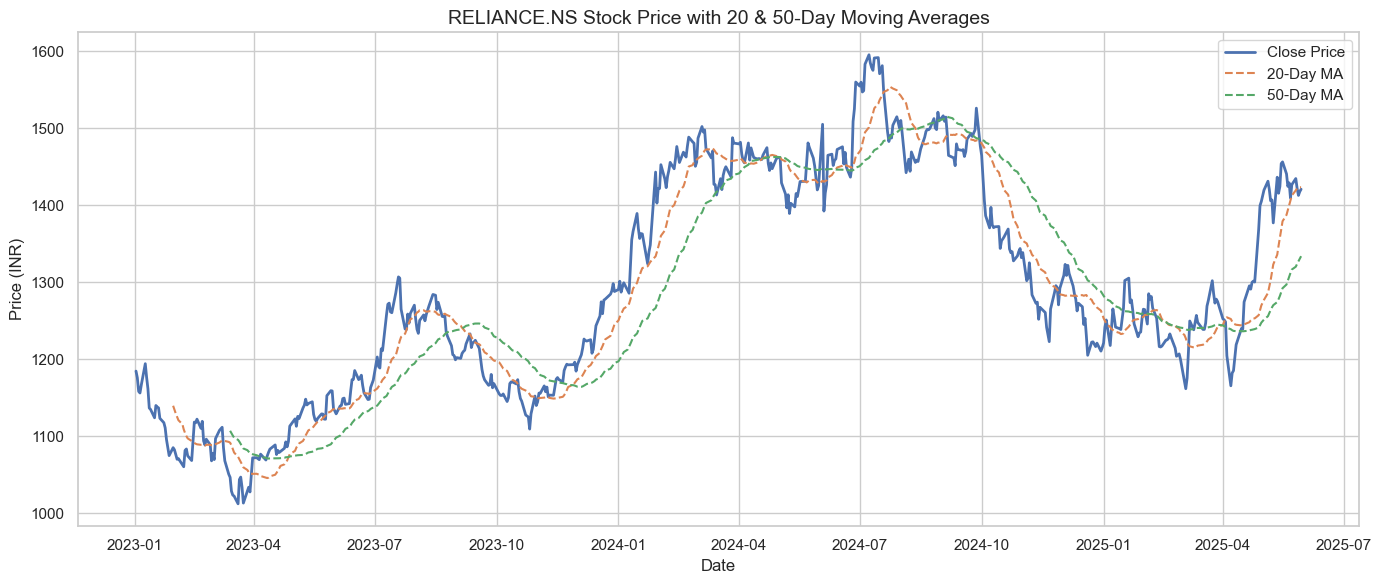

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Filter for one company to visualize
company = 'RELIANCE.NS'
df_plot = combined_df[combined_df['Company'] == company]

plt.figure(figsize=(14, 6))
plt.plot(df_plot['Date'], df_plot['Close'], label='Close Price', linewidth=2)
plt.plot(df_plot['Date'], df_plot['20-Day MA'], label='20-Day MA', linestyle='--')
plt.plot(df_plot['Date'], df_plot['50-Day MA'], label='50-Day MA', linestyle='--')

plt.title(f"{company} Stock Price with 20 & 50-Day Moving Averages", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.tight_layout()
plt.show()


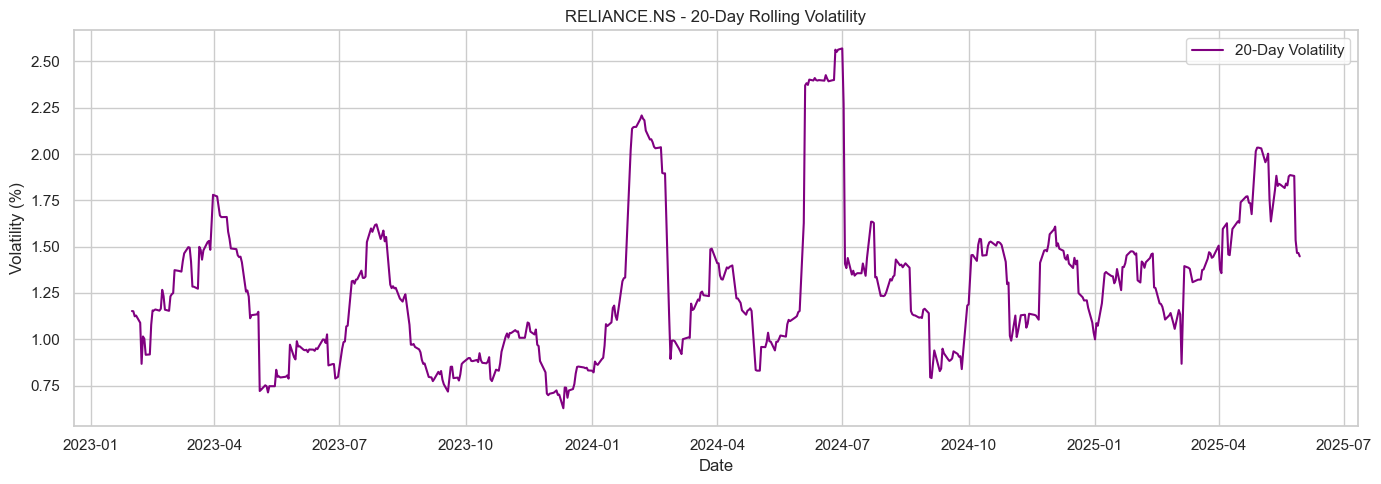

In [ ]:
# Calculate rolling standard deviation for volatility (optional window = 20 days)
combined_df['Volatility (20D)'] = combined_df.groupby('Company')['Daily Return (%)'].transform(lambda x: x.rolling(window=20).std())

# Plot volatility for a selected company
company = 'RELIANCE.NS'
df_plot = combined_df[combined_df['Company'] == company]

plt.figure(figsize=(14, 5))
plt.plot(df_plot['Date'], df_plot['Volatility (20D)'], color='purple', label='20-Day Volatility')
plt.title(f'{company} - 20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.tight_layout()
plt.show()


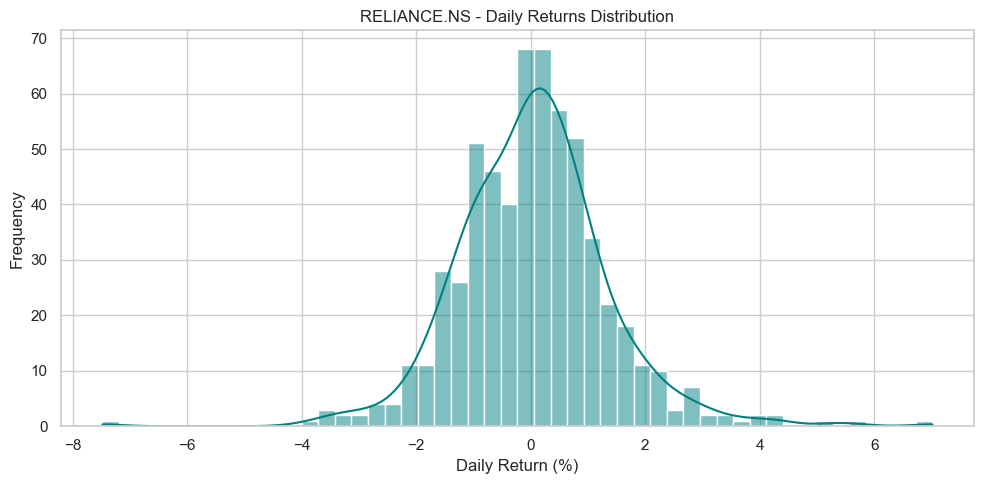

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df_plot['Daily Return (%)'].dropna(), bins=50, kde=True, color='teal')
plt.title(f'{company} - Daily Returns Distribution')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


C:\Users\Nisarg\AppData\Local\Temp\ipykernel_22152\48509210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_returns.values, y=avg_returns.index, palette='coolwarm')


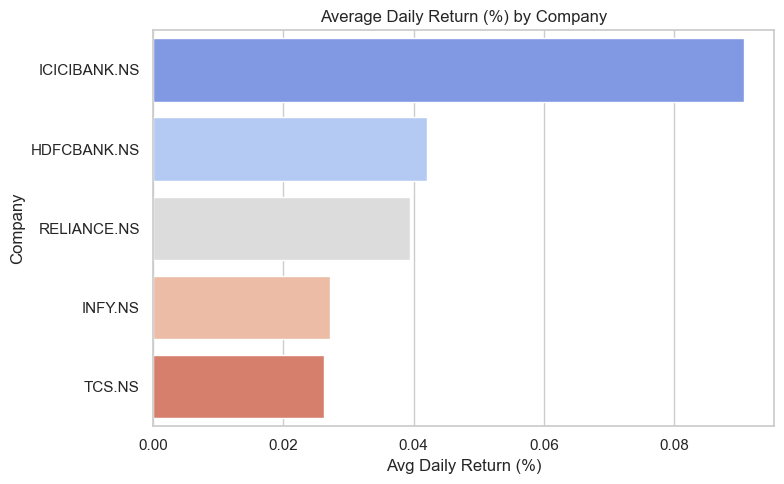

In [ ]:
# Average Daily Return per Company
avg_returns = combined_df.groupby('Company')['Daily Return (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_returns.values, y=avg_returns.index, palette='coolwarm')
plt.title("Average Daily Return (%) by Company")
plt.xlabel("Avg Daily Return (%)")
plt.ylabel("Company")
plt.tight_layout()
plt.show()


In [ ]:
data['RELIANCE.NS'].head()

Price,Open,High,Low,Close,Volume
Date,,,,,
2023-01-02,1172.844019,1186.182295,1172.016140,1184.756470,5316175
2023-01-03,1179.766076,1183.422612,1171.832188,1176.086548,7658932
2023-01-04,1176.063514,1177.926332,1156.286155,1158.378906,9264891
2023-01-05,1160.655659,1166.588891,1151.686831,1156.309204,13637099
2023-01-06,1162.104379,1171.901085,1158.263899,1166.818726,6349597
